# Market Research to open a small robot-run cafe in LA area

#### Project description:

We have decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we have to first attract investors. They’re interested in the current market conditions but we have to maintain our success when the novelty of robot waiters wears off.

So, we are asked to prepare some market research using open-source data on restaurants in LA.

##### Data description
- rest_data table:
    - object_name — establishment name
    - chain — chain establishment (TRUE/FALSE)
    - object_type — establishment type
    - address — address
    - number — number of seats

#### Steps to take:
- Step 1: Open the data file and study the general information.
- Step 2: Prepare the data 
    - We will view the data in more detail to convert them to the required types, replace the column names and find missing values.Find and eliminate errors in the data.
- Step 3: Analyze the data 
    - Investigate the proportions of the various types of establishments. Plot a graph.
    - Investigate the proportions of chain and nonchain establishments. Plot a graph.
    - Which type of establishment is typically a chain?
    - What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
    - Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
    - Put the data on street names from the address column in a separate column.
    - Plot a graph of the top ten streets by number of restaurants.
    - Find the number of streets that only have one restaurant.
    - For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see? 

- Step 4: Preparing a presentation
  
  
#### Goal: 
      - prepare market research conclusion and provide recommendation on restaurant type and number of seats.



## Steps followed to complete the project:

 ## Step 1. Open the data file and study the general information

In [1]:
##### Import default libraries
try:
    import pandas as pd # manipulate and wrangle the data  
    import numpy as np
    import matplotlib.pyplot as plt #2d plotting library which produces publication quality figures in a variety of formats
    import seaborn as sns # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics
except:
    print("An exception occurred")
    
from scipy import stats # for mathematics, science, and engineering
from math import ceil as math
from scipy import stats as st

#read data from file
df = pd.read_csv('/datasets/rest_data_us.csv')

In [2]:
# study general information 
df.info()

display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


## Step 2: Prepare the data for Analysis
In this step, we are viewing the data in more detail to convert them to the necessary types. Find and eliminate errors in the data

Replace the column names (make them lowercase).
Convert the data to the required types.
If necessary, decide how to deal with missing values:
Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [3]:
# checking if there are any null/blank columns
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
chain,3,0.0
id,0,0.0
object_name,0,0.0
address,0,0.0
object_type,0,0.0
number,0,0.0


In [6]:
# checking for duplicated rows
df.duplicated().sum()

0

In [7]:
# checking for null in chain column
df[df['chain'].isnull()]


,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [8]:
e# backfilling NAN in 'Chain' column with false
df['chain'].mode()
df['chain']= df['chain'].fillna(df['chain'].mode()[0])

In [9]:
# rename column names
df.columns = ['id', 'name', 'address', 'chain', 'type', 'total_seats']

### Conclusion:
We dropped any duplicates in the database. We renamed column names so that names are more relevant. We also backfilled null values with the mode of that column.

## Step 3. Analyze the data

### Investigate the proportions of the various types of establishments. Plot a graph

         type  counts
0  Restaurant    7255
1   Fast Food    1066
2        Cafe     435
3       Pizza     320
4         Bar     292
5      Bakery     283


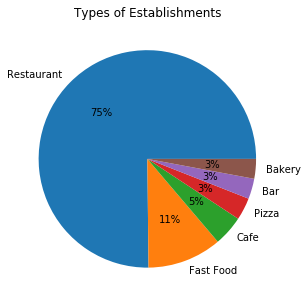

In [10]:

Est_type = df['type'].value_counts().rename_axis('type').reset_index(name='counts')
print(Est_type)

# plot pie chart with proportions
plt.figure(figsize=(10, 5))

plt.pie(Est_type['counts'], labels=Est_type['type'],autopct='%0.f%%')

plt.title('Types of Establishments')
plt.show()

### Conclusion:

Based on the pie-chart plotting above, 75% of establishments are restaurants, 11% of establishments are fast food, and the rest are broken down between cafe, pizza, bar and bakery.

LA is the 26th most populous city of the United States and is also knowns as a resort city internationally. Hence, it is a tourist destination. It is not surprising to see that restaurants are predominant there.

### Investigate the proportions of chain and nonchain establishments. Plot a graph

   chain    counts
0  False  0.619107
1   True  0.380893


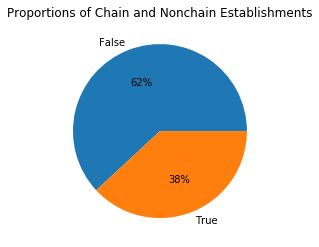

In [11]:
# transform value_counts for chain establishment to dataframe

Est_chain = df['chain'].value_counts(normalize=True).rename_axis('chain').reset_index(name='counts')
print(Est_chain)
# plot pie chart with proportions
plt.pie(Est_chain['counts'], labels=Est_chain['chain'],autopct='%0.f%%')
plt.title('Proportions of Chain and Nonchain Establishments')
plt.show()

### Conclusion:

Based on the pie-chart above, 62% of the establishments are non-chain establishments, while 38% are chain. The majority of establishments in LA are the non-chain type because LA being a tourist hub, the food industry is extremely good there. Restaurants can survive independently without chains. They have to be unique to attract tourists not a cookie-cutter place.

### Which type of establishment is typically a chain?

type        chain
Bakery      True     1.000000
Bar         False    0.736301
            True     0.263699
Cafe        True     0.611494
            False    0.388506
Fast Food   True     0.567542
            False    0.432458
Pizza       False    0.521875
            True     0.478125
Restaurant  False    0.684080
            True     0.315920
Name: chain, dtype: float64


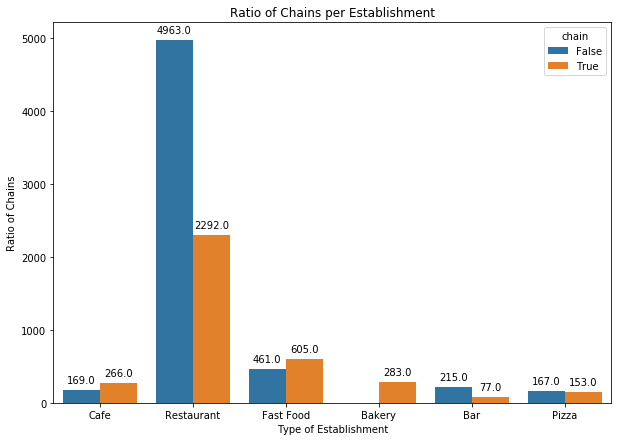

In [12]:
# group data by type and chain
chain_share = df.groupby(['type'])['chain'].value_counts(normalize = True)
print(chain_share)

# plot bar charts with swicthing colors

plt.figure(figsize=(10, 7))

ax=sns.countplot(x='type',hue = 'chain',data = df)

# Add titles and captions
plt.xlabel('Type of Establishment')
plt.ylabel('Ratio of Chains')
plt.title('Ratio of Chains per Establishment')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()

### Conclusion:
Based on the pie-chart plotting above, all bakeries are part of chain. Likewise, more than half of cafes, fastfood are chains as well. More than half of the restaurants and bars in the other hand are non-chain type.
Hence, restaurant is typically a non-chain type and also, the bars based on the plotting above.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

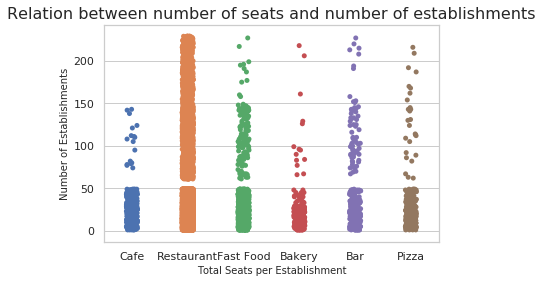

In [13]:
import seaborn
# use to set style of background of plot
seaborn.set(style = 'whitegrid')

stripplot = seaborn.stripplot(x="type", y="total_seats", data=df, jitter=0.1)
stripplot.axes.set_title("Relation between number of seats and number of establishments", fontsize=16)

stripplot.set_xlabel("Total Seats per Establishment", fontsize=10)
stripplot.set_ylabel("Number of Establishments", fontsize=10)
plt.show()

### Conclusion:
Based on the strip plotting above, many establishments have 50 seats in general while less establishments have seats between 150-200. 
In general, Chains are characterized by having many establishments with a small number of seats.

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

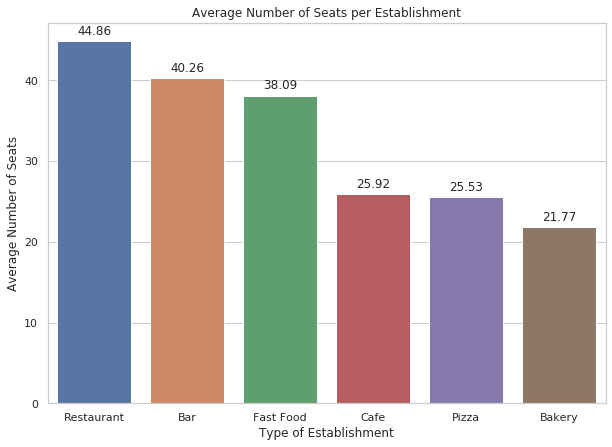

In [14]:
# extract data from only chains
type_ChainData = df[df['chain'] == True]

avg_ChainData = type_ChainData.groupby('type').agg({'total_seats':['mean']}).reset_index()
avg_ChainData.columns = ['Chain_type','avg_seats']
#print(avg_ChainData)



plt.figure(figsize=(10, 7))

# Plot barplot
ax = sns.barplot(data = avg_ChainData.sort_values('avg_seats', ascending=False), 
                 x='Chain_type', 
                 y='avg_seats')

# Add titles and captions
plt.xlabel('Type of Establishment')
plt.ylabel('Average Number of Seats')
plt.title('Average Number of Seats per Establishment')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')


plt.show()

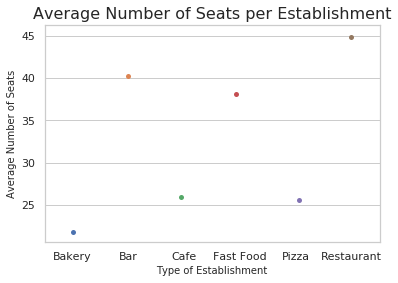

In [15]:
## another plot for average number of seats per establishment
import seaborn
# use to set style of background of plot
seaborn.set(style = 'whitegrid')

stripplot = seaborn.stripplot(x="Chain_type", y="avg_seats", data=avg_ChainData, jitter=0.1)
stripplot.axes.set_title("Average Number of Seats per Establishment", fontsize=16)

stripplot.set_xlabel("Type of Establishment", fontsize=10)
stripplot.set_ylabel("Average Number of Seats", fontsize=10)
plt.show()

### Conclusion:
Based on the plotting above, restaurants have the greatest number of seats ( more than 45 seats) in  general whereas bakery and cafe have the least number of seats (below 30 seats).

### Put the data on street names from the address column in a separate column.



In [16]:
#!pip install usaddress
#import usaddress

#df['street_name'] = df['address'].apply(lambda x: usaddress.parse(x) )
#df['street_name']
#.str.extract(r'(?P<StreetName>\d{,5})')



In [17]:
def get_streetname(x):
    split_address = x.replace("#", "").replace("/", "").split()
    new = []
    for i in split_address:
        if i.isdigit():
            continue
        else:
            new.append(i)
    return ' '.join(new)  

def filter_streetname(filter):
    new= []
    y=filter.split(' ')
    ending_with = ['BLVD','ST','AVE','RD','DR','WAY']
    for i in y:
        if i in ending_with and i != 'STE': 
            new.append(i)
            return " ".join(new)
        elif i == 'STE':
            return " ".join(new)
        new.append(i)
    return " ".join(new)


In [18]:
df['street_name'] = df['address'].apply(
    lambda x: get_streetname(x)).apply(lambda x: filter_streetname(x))

#df[['street_name','address']]
display(df)

,id,name,address,chain,type,total_seats,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST


### Plot a graph of the top ten streets by number of restaurants.

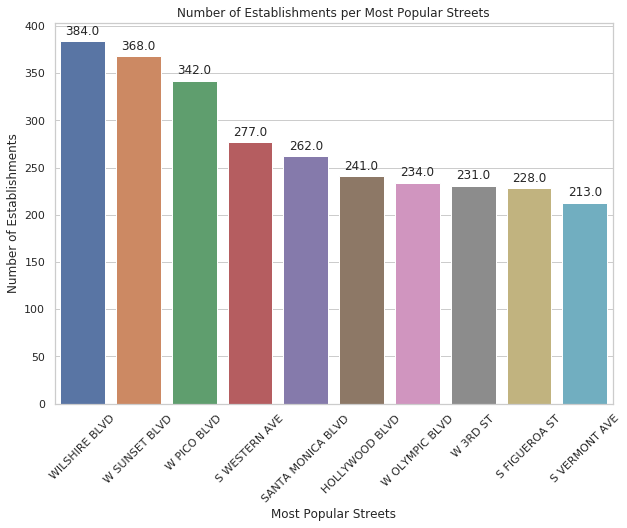

In [19]:
street_data = pd.pivot_table(df, index=['street_name'], values=['id'], aggfunc=['count']).reset_index()
street_data.columns = ['street_name','count']

top10_street_data = street_data.sort_values(by='count', ascending=False).head(10)

# Plot barplot
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = top10_street_data.sort_values('count', ascending=False), 
                 x='street_name', 
                 y='count')

# Add titles and captions
plt.xlabel('Most Popular Streets')
plt.ylabel('Number of Establishments')
plt.title('Number of Establishments per Most Popular Streets')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

### Conclusion:
Based on the bar chart plotting above, the most streets for establishments are Wilshire Blvd, W Sunset Blvd, W Pico Blvd, S Western Ave, Santa Monica Blvd, W Olympic Blvd, W 3rd St, S Figueroa St, S Vermont Ave.

### Find the number of streets that only have one restaurant.

In [20]:
#print(street_data)
#one_street_data = street_data[street_data['count'] == 1]
#print(one_street_data)

#n = len(pd.unique(one_street_data['street_name']))
  
#print("The number of streets that only have one restaurant  :", 
 #    n)

In [21]:
# other option
streets_with_one_est = street_data.query('count == 1').reset_index(drop=True)
print('The number of streets that only have one establishment is: {}'.format(len(streets_with_one_est)))

The number of streets that only have one establishment is: 372


### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [22]:
#print(street_data)
#avgNumRestaurants = street_data['count'].mean().round()

#avgStreetData = street_data[street_data['count'] > avgNumRestaurants]

#print(avgStreetData)
#avgStreet_seats_Data = df[df.street_name.isin(avgStreetData['street_name'])]


In [23]:
# another option
#1. calculating the 90th or 95th percentile for the number of establishment
np.percentile(street_data['count'],[90,95])

array([26. , 56.5])

In [24]:
#2. getting the list of streets that have more resturants than number  you set as a threshold
list_of_streets = list(street_data[street_data['count']>50]['street_name'])
#list_of_streets

In [25]:
#3. gettting a slice of data containing only the observations for the streets that are present in the lthe list above
many_resturants = df[df['street_name'].isin(list_of_streets)]
#many_resturants

Thus, let's consider only those streets that have more than 50 resturants.

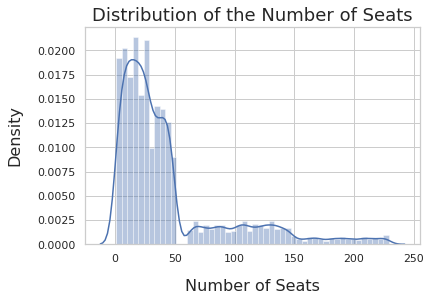

In [26]:
# plot distribution plot

sns.distplot(many_resturants['total_seats'],kde = True)

plt.xlabel('Number of Seats', labelpad=15, fontsize=16)
plt.ylabel('Density', labelpad=15, fontsize=16)
plt.title('Distribution of the Number of Seats',fontsize=18)


plt.show()

### Conclusion:
For streets with a lot of establishments, most of those establishments have 50  or less seats.

### Step 3. Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

Based on the analysis of market research data provided on food establishments in Los Angeles, we can conclude that:

There are various types of establishments in the LA area. The most popular establishment is restaurants which covers 75% of all establishments. There are chain and non-chain types of establishments as well. 62% of establishments are non-chains whereas 38% are chains. Certain types of establishments are largely part of a chain: over 50% of bakeries, cafes, and fast food places are part of a chain while less than 50% of restaurants and bars are part of a chain. In general, Chains are characterized by having many establishments with a small number of seats (less than 50 seats). The average number of seats in a restaurant is 45, in a bar are 40 seats and less than those 30 seats for other food establishments. The streets with the most food establishments in LA are Wilshire Blvd, W Sunset Blvd, W Pico Blvd, S Western Ave, Santa Monica Blvd, W Olympic Blvd, W 3rd St, S Figueroa St, S Vermont Ave. The establishments are over 250 on those streets and seating mostly anywhere between 20-60.

Based on the finding above, we can recommend that the most beneficial establishment would be a restaurant, considering the fact that a large % of non-chain establishments are restaurants and that makes it relatively easier to compete in the food market. Restaurants with 20-60 seatings located on any of the popular streets mentioned above would be deal with to maintain a successful establishment.

## Step 4. Preparing a presentation

https://docs.google.com/presentation/d/1r-cklws7x6u2y0Z5vGf5ebqRrnfgZJg6/edit?usp=sharing&ouid=112318298311349268618&rtpof=true&sd=true